<a href="https://colab.research.google.com/github/guilhermeterenciani/IA/blob/main/Lista_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 8

In [ ]:
import torch
import torch.nn as nn

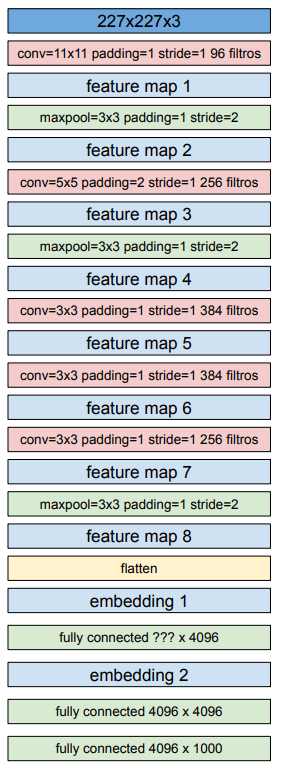

In [ ]:
x = torch.randn((1,3,227,227))
x.shape

torch.Size([1, 3, 227, 227])

In [ ]:
from torch.nn.modules.activation import ReLU
conv1 = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=1,padding=1)
)

In [ ]:
conv1[0].weight.shape

torch.Size([96, 3, 11, 11])

In [ ]:
s1 = conv1(x)

In [ ]:
s1.shape

torch.Size([1, 96, 219, 219])

In [ ]:
import torchsummary
import numpy as np
torchsummary.summary(conv1,(3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 96, 219, 219]          34,944
Total params: 34,944
Trainable params: 34,944
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.59
Forward/backward pass size (MB): 35.13
Params size (MB): 0.13
Estimated Total Size (MB): 35.85
----------------------------------------------------------------


In [ ]:
(11*11*3 +1) * 96

34944

In [ ]:
relu = nn.ReLU()

In [ ]:
s2 = relu(s1)

In [ ]:
pool1 = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)

In [ ]:
s3 = pool1(s2)

In [ ]:
s3.shape

torch.Size([1, 96, 110, 110])

In [ ]:
conv2 = nn.Sequential(nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1,padding=2))

In [ ]:
s4 = conv2(s3)

In [ ]:
s4.shape

torch.Size([1, 256, 110, 110])

In [ ]:
torchsummary.summary(conv2,(96,110,110))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 256, 110, 110]         614,656
Total params: 614,656
Trainable params: 614,656
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 4.43
Forward/backward pass size (MB): 23.63
Params size (MB): 2.34
Estimated Total Size (MB): 30.41
----------------------------------------------------------------


In [ ]:
(5*5*96+1)*256

614656

In [ ]:
s5 = relu(s4)

In [ ]:
s6 = pool1(s5)

In [ ]:
s6.shape

torch.Size([1, 256, 55, 55])

In [ ]:
conv3 = nn.Sequential(nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1,padding=1))

In [ ]:
s7 = conv3(s6)

In [ ]:
torchsummary.summary(conv3,(256,55,55))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 384, 55, 55]         885,120
Total params: 885,120
Trainable params: 885,120
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 2.95
Forward/backward pass size (MB): 8.86
Params size (MB): 3.38
Estimated Total Size (MB): 15.19
----------------------------------------------------------------


In [ ]:
s8 = relu(s7)

In [ ]:
s8.shape

torch.Size([1, 384, 55, 55])

In [ ]:
#parâmetros conv3x3
(3*3*256+1)*384

885120

In [ ]:
conv4 = nn.Sequential(nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1,padding=1))

In [ ]:
s9 = conv4(s8)

In [ ]:
torchsummary.summary(conv4,(384, 55, 55))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 384, 55, 55]       1,327,488
Total params: 1,327,488
Trainable params: 1,327,488
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 4.43
Forward/backward pass size (MB): 8.86
Params size (MB): 5.06
Estimated Total Size (MB): 18.36
----------------------------------------------------------------


In [ ]:
s9.shape

torch.Size([1, 384, 55, 55])

In [ ]:
s10 = relu(s9)

In [ ]:
(3*3*384+1)*384

1327488

In [ ]:
conv5 = nn.Sequential(nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1))

In [ ]:
s11 = conv5(s10)

In [ ]:
torchsummary.summary(conv5,(384, 55, 55))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 256, 55, 55]         884,992
Total params: 884,992
Trainable params: 884,992
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 4.43
Forward/backward pass size (MB): 5.91
Params size (MB): 3.38
Estimated Total Size (MB): 13.72
----------------------------------------------------------------


In [ ]:
s12 = relu(s11)
s12.shape

torch.Size([1, 256, 55, 55])

In [ ]:
(3*3*384+1)*256

884992

In [ ]:
s13 = pool1(s12)

In [ ]:
s13.shape

torch.Size([1, 256, 28, 28])

In [ ]:
28*28*256*4096 +1

822083585

In [ ]:
flatten =nn.Flatten()

In [ ]:
s14 = flatten(s13)
s14.shape

torch.Size([1, 200704])

In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
    nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1,padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
    nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
    nn.Flatten(),
    nn.Linear(28*28*256,4096),
    nn.ReLU(),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Linear(4096,1000)
)

In [ ]:
torchsummary.summary(model,(3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 96, 219, 219]          34,944
              ReLU-2         [-1, 96, 219, 219]               0
         MaxPool2d-3         [-1, 96, 110, 110]               0
            Conv2d-4        [-1, 256, 110, 110]         614,656
              ReLU-5        [-1, 256, 110, 110]               0
         MaxPool2d-6          [-1, 256, 55, 55]               0
            Conv2d-7          [-1, 384, 55, 55]         885,120
              ReLU-8          [-1, 384, 55, 55]               0
            Conv2d-9          [-1, 384, 55, 55]       1,327,488
             ReLU-10          [-1, 384, 55, 55]               0
           Conv2d-11          [-1, 256, 55, 55]         884,992
             ReLU-12          [-1, 256, 55, 55]               0
        MaxPool2d-13          [-1, 256, 28, 28]               0
          Flatten-14               [-1,

In [ ]:
(28*28*256 +1)*4096

822087680

In [ ]:
(4096 +1)*4096

16781312

In [ ]:
(4096+1)*1000

4097000

In [ ]:
#Quantidade de parâmetros
34944+614656+885120+1327488+884992+(28*28*256 +1)*4096 +(4096*(4096 +1))+ (4096+1)*1000

846713192

In [ ]:
class ModelLista1(nn.Module):
    def __init__(self):
        super(ModelLista1,self).__init__()
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
            nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
            nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
            nn.Flatten(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(28*28*256,4096),
            nn.ReLU(),
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Linear(4096,1000)
        )
    def forward(self,x):
        x = self.backbone(x)
        return self.classifier(x)

In [ ]:
torchsummary.summary(ModelLista1(),(3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 96, 219, 219]          34,944
              ReLU-2         [-1, 96, 219, 219]               0
         MaxPool2d-3         [-1, 96, 110, 110]               0
            Conv2d-4        [-1, 256, 110, 110]         614,656
              ReLU-5        [-1, 256, 110, 110]               0
         MaxPool2d-6          [-1, 256, 55, 55]               0
            Conv2d-7          [-1, 384, 55, 55]         885,120
              ReLU-8          [-1, 384, 55, 55]               0
            Conv2d-9          [-1, 384, 55, 55]       1,327,488
             ReLU-10          [-1, 384, 55, 55]               0
           Conv2d-11          [-1, 256, 55, 55]         884,992
             ReLU-12          [-1, 256, 55, 55]               0
        MaxPool2d-13          [-1, 256, 28, 28]               0
          Flatten-14               [-1,

## 7b

In [ ]:
imagem = torch.tensor([[[0, 1, 0, 0],
                        [1, 1, 1, 1],
                        [0, 1, 1, 1],
                        [1, 0, 0, 1]],
                       [[0, 0, 0, 1],
                        [0, 1, 0, 1],
                        [1, 0, 0, 0],
                        [1, 1, 1, 1]],
                       [[1, 1, 0, 0],
                        [0, 1, 1, 0],
                        [0, 1, 1, 1],
                        [1, 0, 1, 0]]],dtype=torch.float32)

In [ ]:
kernel = torch.tensor(([[   [ 0, 1, 2],
                            [ 3, 4, 5],
                            [ 6, 7, 8]
                        ],
                        [   [ 9, 10, 11],
                            [12, 13, 14],
                            [15, 16, 17]
                        ],
                        [   [18, 19, 20],
                            [21, 22, 23],
                            [24, 25, 26]
                        ]
                       ]
                       )
                    ,dtype=torch.float32
                    )

In [ ]:
kernel.unsqueeze(0).shape

torch.Size([1, 3, 3, 3])

In [ ]:
conv = nn.Conv2d(in_channels=3,out_channels=1,kernel_size=3,stride=1,padding=0)
conv.weight = nn.Parameter(kernel.unsqueeze(0))


In [ ]:
s1 =conv(imagem.unsqueeze(0))

In [ ]:
s1

tensor([[[[188.9881, 205.9881],
          [221.9881, 218.9881]]]], grad_fn=<ConvolutionBackward0>)

## 2D

In [ ]:
import numpy as np

In [ ]:
dataset = np.array([[1,50,120],[1,60,150],[1,100,250]])

In [ ]:
X = dataset[:,0:2]

In [ ]:
y = dataset[:,2]

In [ ]:
theta = np.array([2,2])

In [ ]:
y_hat = X@theta

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X[:,1]

array([ 50,  60, 100])

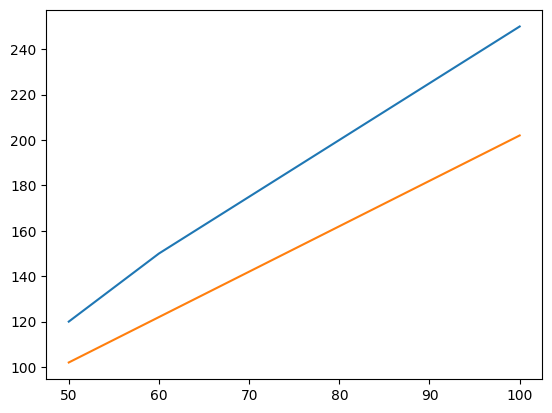

In [ ]:
plt.plot(X[:,1],y)
plt.plot(X[:,1],y_hat)
plt.show()


In [ ]:
alpha = 1*10**-4

[2.00313333 2.246     ]
[-18 -28 -48]
[  -94 -7380]


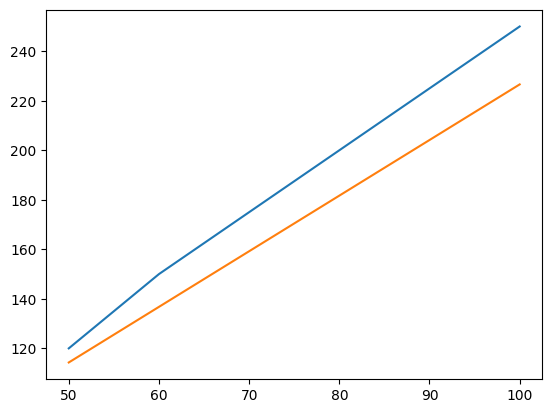

In [ ]:
theta = theta - (alpha*(y_hat-y)@X)/3
print(theta)
print((y_hat-y))
print((y_hat-y)@X)
y_hat = X@theta
plt.plot(X[:,1],y)
plt.plot(X[:,1],y_hat)
plt.show()

## Resposta


In [ ]:
import numpy as np

In [ ]:
X = np.array(  [
                [1,0,0],
                [1,0,1],
                [1,1,0],
                [1,1,1]
            ])

In [ ]:
y = np.array([0,0,0,1])

In [ ]:
theta = np.array([1,1,1])

In [ ]:
import matplotlib.pyplot as plt

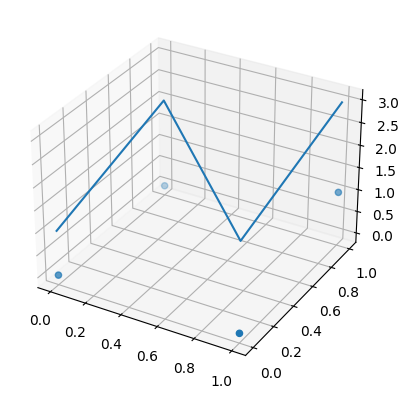

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1],X[:,2],y)
ax.plot(X[:,1],X[:,2],X@theta.T)
plt.show()

In [ ]:
g = lambda z: 1/(1+np.exp(-z))

In [ ]:
loss = ((g(X@theta.T) -y)**2).sum()/len(X)
loss

0.5220757109959823

In [ ]:
gx = g(X@theta.T)

In [ ]:
derivada = (gx-y)*gx*(1-gx)@X
derivada

array([0.32654838, 0.0903355 , 0.0903355 ])

In [ ]:
theta = theta - derivada


In [ ]:
theta

array([0.67345162, 0.9096645 , 0.9096645 ])

In [ ]:
(X@theta.T).shape

(4,)

In [ ]:
g(X@theta.T).shape

(4,)

In [ ]:
X

array([[1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [ ]:
(2*(gx-y)*gx*(1-gx)).shape

(4,)

In [ ]:
for i in range(1000):
   loss = ((g(X@theta.T) -y)**2).sum()/len(X)
   gx = g(X@theta.T)
   derivada = 2*(gx-y)*gx*(1-gx)@X
   theta = theta - 0.001*derivada

In [ ]:
g([1,1,0]@theta.T)

0.09812828048388482

In [ ]:
g([1,1,1]@theta.T)

0.882565582915662